<a href="https://colab.research.google.com/github/sohamchandane/Synapse_Tasks/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'upload1:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5495298%2F9105146%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240805%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240805T125752Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D403f376e213883d2eb6b0c3a86ec1b5d90ee292c4185c0e3b1348fcce5786928802eaaf93e5a501128fa98b8143f0003c8069ea43463beee10e696ffb7080aa3736f2ba694a5fb133fd73e0c76f2f8961d7e01565d597e27f59ba620848fe4b32c41e220ba8424a81ddd693e5fe9ee31e8d885c2920fe25dd09f53304a3bedf6c6272626b82aecd37f588dc995d8f43ec59484fe3c389b8899fe024a06355ecb984cf22e6d7aeec4dfbfb897d2773ce0d518244c85af5237180bb3eda47730b3f4a32de57f7f1cfc55bf572c4a16ec6eeef07dfdf7c7a927ffcfa17a33c1ddde43611d22d553c1c49af2d558ce2ab4bfcd8816d09f478d3be404c48cb7dbb972'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/upload1/GE_2024_Results (1).csv


In [ ]:
df = pd.read_csv('/kaggle/input/upload1/GE_2024_Results (1).csv')
df

,ID,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Result
0,1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436.0,50.58,Won
1,2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040.0,38.54,Lost
2,3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254.0,4.08,Lost
3,4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,JOE BIDEN,Congress,NaN,NaN,NaN,NaN,Lost
4,4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017.0,2.97,Lost
...,...,...,...,...,...,...,...,...,...,...
8901,8899,West Bengal,Uluberia,NIKHIL BERA,Socialist Unity Centre Of India (COMMUNIST),2095,12,2107.0,0.15,Lost
8902,8900,West Bengal,Uluberia,AMAL KUMAR BARMAN,Independent,1997,3,2000.0,0.14,Lost
8903,8904,Andaman & Nicobar Islands,Andaman & Nicobar Islands,Hillary Clinton,Congress,NaN,NaN,NaN,NaN,Lost
8904,8901,West Bengal,Uluberia,RAMPRASAD GHORAI,Indian Unity Centre,1568,4,1572.0,0.11,Lost


<h2>This is a tabular dataset consisting of the results of Indian General Elections 2024.
As you can see when you print the dataframe you can see its size at the bottom.

There is another way to find out the dimensions of a dataframe.
Enter the code to find that out in the following cell.</h2>

In [ ]:
df.shape

(8906, 10)

<h2>Write the code to display the first 20 rows of the dataframe.</h2>

In [ ]:
df.head(20)

,ID,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Result
0,1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436.0,50.58,Won
1,2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040.0,38.54,Lost
2,3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254.0,4.08,Lost
3,4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,JOE BIDEN,Congress,NaN,NaN,NaN,NaN,Lost
4,4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017.0,2.97,Lost
5,5,Andaman & Nicobar Islands,Andaman & Nicobar Islands,V.K. ABDUL AZIZ,Independent,2195,8,2203.0,1.09,Lost
6,6,Andaman & Nicobar Islands,Andaman & Nicobar Islands,K J B SELVARAJ,All India Anna Dravida Munnetra Kazhagam,911,3,914.0,0.45,Lost
7,7,Andaman & Nicobar Islands,Andaman & Nicobar Islands,DR ARUN KUMAR MALLIK,Bahujan Samaj Party,714,5,719.0,0.36,Lost
8,8,Andaman & Nicobar Islands,Andaman & Nicobar Islands,RINKU MALA MONDAL,Independent,539,3,542.0,0.27,Lost
9,4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,JUSTIN TRUDEAU,Congress,NaN,NaN,NaN,NaN,Lost


<h2>You can see that we already have one column for indices and we dont need an extra to create consfusion.
Write a code to remove the ID column.</h2>

In [ ]:
df.set_index("ID", inplace=True)
df

,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Result
ID,,,,,,,,,
1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436.0,50.58,Won
2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040.0,38.54,Lost
3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254.0,4.08,Lost
4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,JOE BIDEN,Congress,NaN,NaN,NaN,NaN,Lost
4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017.0,2.97,Lost
...,...,...,...,...,...,...,...,...,...
8899,West Bengal,Uluberia,NIKHIL BERA,Socialist Unity Centre Of India (COMMUNIST),2095,12,2107.0,0.15,Lost
8900,West Bengal,Uluberia,AMAL KUMAR BARMAN,Independent,1997,3,2000.0,0.14,Lost
8904,Andaman & Nicobar Islands,Andaman & Nicobar Islands,Hillary Clinton,Congress,NaN,NaN,NaN,NaN,Lost


<h2>You can see some NaN values in the dataframe,
these are something that will cause errors later and we don't want that.
Write a code to remove these values from our dataframe.
Additionally you'll see that the index values are not in order. Take care of that as well :)</h2>

In [ ]:
df.head(15)
#Here we can see some scattered indices

,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Result
ID,,,,,,,,,
1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436.0,50.58,Won
2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040.0,38.54,Lost
3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254.0,4.08,Lost
4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,JOE BIDEN,Congress,NaN,NaN,NaN,NaN,Lost
4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017.0,2.97,Lost
5,Andaman & Nicobar Islands,Andaman & Nicobar Islands,V.K. ABDUL AZIZ,Independent,2195,8,2203.0,1.09,Lost
6,Andaman & Nicobar Islands,Andaman & Nicobar Islands,K J B SELVARAJ,All India Anna Dravida Munnetra Kazhagam,911,3,914.0,0.45,Lost
7,Andaman & Nicobar Islands,Andaman & Nicobar Islands,DR ARUN KUMAR MALLIK,Bahujan Samaj Party,714,5,719.0,0.36,Lost
8,Andaman & Nicobar Islands,Andaman & Nicobar Islands,RINKU MALA MONDAL,Independent,539,3,542.0,0.27,Lost


In [ ]:
#Sorting the dataset
df = df.sort_values(by = "ID")
df.head(15)

,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Result
ID,,,,,,,,,
1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436.0,50.58,Won
2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040.0,38.54,Lost
3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254.0,4.08,Lost
4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,JUSTIN TRUDEAU,Congress,NaN,NaN,NaN,NaN,Lost
4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,DONALD TRUMP,Congress,NaN,NaN,NaN,NaN,Lost
4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,JOE BIDEN,Congress,NaN,NaN,NaN,NaN,Lost
4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017.0,2.97,Lost
5,Andaman & Nicobar Islands,Andaman & Nicobar Islands,V.K. ABDUL AZIZ,Independent,2195,8,2203.0,1.09,Lost
6,Andaman & Nicobar Islands,Andaman & Nicobar Islands,K J B SELVARAJ,All India Anna Dravida Munnetra Kazhagam,911,3,914.0,0.45,Lost


In [ ]:
#Checking for NaN values
df.isna().sum()

State           0
Constituency    0
Candidate       0
Party           0
EVM Votes       4
Postal Votes    4
Total Votes     4
% of Votes      4
Result          0
dtype: int64

In [ ]:
#Dropping all NaN values
df = df.dropna()

In [ ]:
#After dropping NaN values
df.isna().sum()

State           0
Constituency    0
Candidate       0
Party           0
EVM Votes       0
Postal Votes    0
Total Votes     0
% of Votes      0
Result          0
dtype: int64

<h2>If all is correct your dataframe should have 8902 rows and 9 columns.</h2>

In [ ]:
df.shape

(8902, 9)

<h2>Find out the top 5 most voted candidates in Telangana</h2>

In [ ]:
df.loc[df["State"] == "Telangana"][["Candidate", "EVM Votes"]].sort_values(by = "EVM Votes").head(5)
#Right now the column "EVM Votes" has Object i.e. String datatype, we must convert it to numeric
#However, one of the value of this column is a '-', which is equivalent to 0 votes

,Candidate,EVM Votes
ID,,
7133,GADDAM VIJAY,1006
6999,DURGA PALVANCHA,10112
6978,LINGALA RAVI KUMAR,1017
7305,KOTHAPALLI SAVITHRI,1018
7036,MARLA ANJANEYULU,1019


In [ ]:
#Replacing '-' with 0
df["EVM Votes"] = df["EVM Votes"].replace("-", '0')

In [ ]:
#Now converting the datatype to numeric
df["EVM Votes"] = pd.to_numeric(df["EVM Votes"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8902 entries, 1 to 8902
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         8902 non-null   object 
 1   Constituency  8902 non-null   object 
 2   Candidate     8902 non-null   object 
 3   Party         8902 non-null   object 
 4   EVM Votes     8902 non-null   int64  
 5   Postal Votes  8902 non-null   object 
 6   Total Votes   8902 non-null   float64
 7   % of Votes    8902 non-null   object 
 8   Result        8902 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 695.5+ KB


In [ ]:
#Top 5 most voted candidates in Telangana
df.loc[df["State"] == "Telangana"][["Candidate", "EVM Votes"]].sort_values(by = "EVM Votes", ascending=False).head(5)

,Candidate,EVM Votes
ID,,
7050,EATALA RAJENDER,980712
6854,KONDA VISHWESHWAR REDDY,798517
7138,KUNDURU RAGHUVEER,772264
6958,RAMASAHAYAM RAGHURAM REDDY,759603
6898,ASADUDDIN OWAISI,659278


<h2> Find out the total number of votes received by each state </h2>

In [ ]:
df.groupby("State")['Total Votes'].sum()

State
Andaman & Nicobar Islands                 202514.0
Andhra Pradesh                          33729342.0
Arunachal Pradesh                         723247.0
Assam                                   20059870.0
Bihar                                   43448949.0
Chandigarh                                449275.0
Chhattisgarh                            15061348.0
Dadra & Nagar Haveli and Daman & Diu      297998.0
Goa                                       906538.0
Gujarat                                 29115599.0
Haryana                                 13055572.0
Himachal Pradesh                         4069906.0
Jammu and Kashmir                        5151193.0
Jharkhand                               17241982.0
Karnataka                               38793617.0
Kerala                                  19980436.0
Ladakh                                    135524.0
Lakshadweep                                49200.0
Madhya Pradesh                          37940251.0
Maharashtra              

<h2>Show these values as a percentage of the total number of votes received in the election.</h2>

In [ ]:
df.groupby("State")['Total Votes'].sum()*100/df['Total Votes'].sum()

State
Andaman & Nicobar Islands                0.031380
Andhra Pradesh                           5.226410
Arunachal Pradesh                        0.112068
Assam                                    3.108306
Bihar                                    6.732478
Chandigarh                               0.069616
Chhattisgarh                             2.333778
Dadra & Nagar Haveli and Daman & Diu     0.046175
Goa                                      0.140469
Gujarat                                  4.511504
Haryana                                  2.022980
Himachal Pradesh                         0.630638
Jammu and Kashmir                        0.798185
Jharkhand                                2.671670
Karnataka                                6.011127
Kerala                                   3.095997
Ladakh                                   0.021000
Lakshadweep                              0.007624
Madhya Pradesh                           5.878897
Maharashtra                              8.8

<h2>Now, display the top 5 parties and find out the number of votes received by them</h2>

In [ ]:
df.groupby("Party")['Total Votes'].sum().sort_values(ascending=False).head(5)

Party
Bharatiya Janata Party          235973935.0
Indian National Congress        136759064.0
Samajwadi Party                  29549381.0
All India Trinamool Congress     28213393.0
Independent                      17844442.0
Name: Total Votes, dtype: float64

<h2>From the candidates who lost, list 10 candidates who got the highest percent votes.</h2>

In [ ]:
totalVotes = df.loc[(df["Result"] == "Lost") & (df['Candidate'] != "NOTA")].groupby("Candidate")['Total Votes'].sum()
(totalVotes*100/df['Total Votes'].sum()).sort_values(ascending=False).head(10)

Candidate
D K SURESH                                0.125411
NISITH PRAMANIK                           0.116078
RAJ BABBAR                                0.113619
PROFESSOR M.V RAJEEV GOWDA                0.112584
UTTAM BARIK SON OF LATE BIRENDRA BARIK    0.110857
PRAHLAD GUNJAL                            0.109787
KANHAIYA KUMAR                            0.109437
ARUP KANTI DIGAR                          0.109425
DEBANGSHU BHATTACHARYA                    0.106584
PORLAL BATHA KHARTE                       0.106118
Name: Total Votes, dtype: float64

<h2>Make a piechart to show the votes recieved by the top 5 candidates in the elections.</h2>

<Axes: title={'center': 'Top 5 candidates'}>

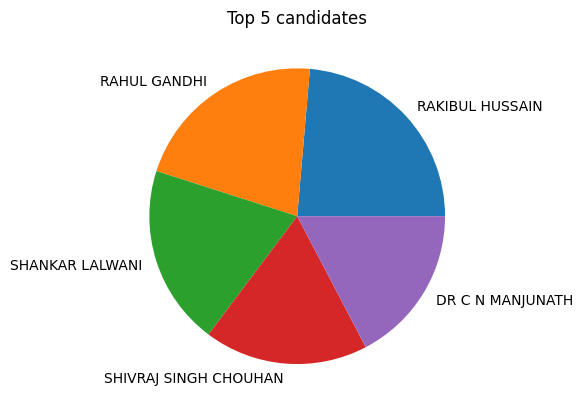

In [ ]:
#Without using matplotlib
df.loc[df["Candidate"]!="NOTA"].groupby("Candidate")['Total Votes'].sum().sort_values(ascending=False).head(5).plot(kind='pie', ylabel='', title='Top 5 candidates')


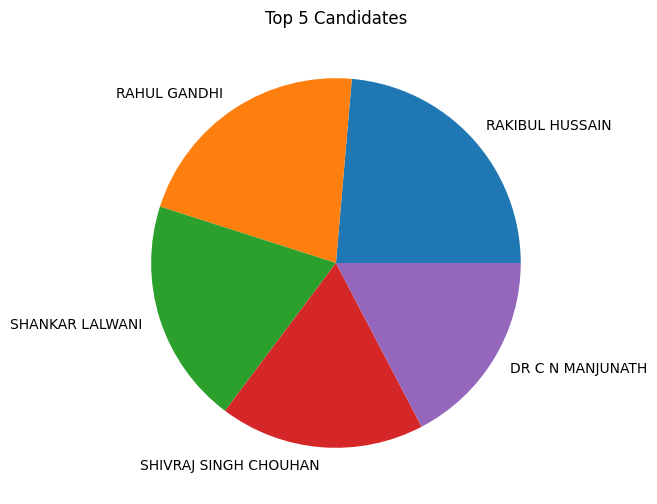

In [ ]:
#With using matplotlib

import matplotlib.pyplot as plt
pieData = df.loc[df["Candidate"]!="NOTA"].groupby("Candidate")['Total Votes'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(6,6))
plt.title("Top 5 Candidates")
plt.pie(pieData, labels = pieData.index)
plt.show()

<h2>Make a bar graph to see the postal votes received by the parties in Karnataka</h2>

<Axes: title={'center': 'Postal Votes by Party in Karnataka'}, xlabel='Party', ylabel='Postal Votes'>

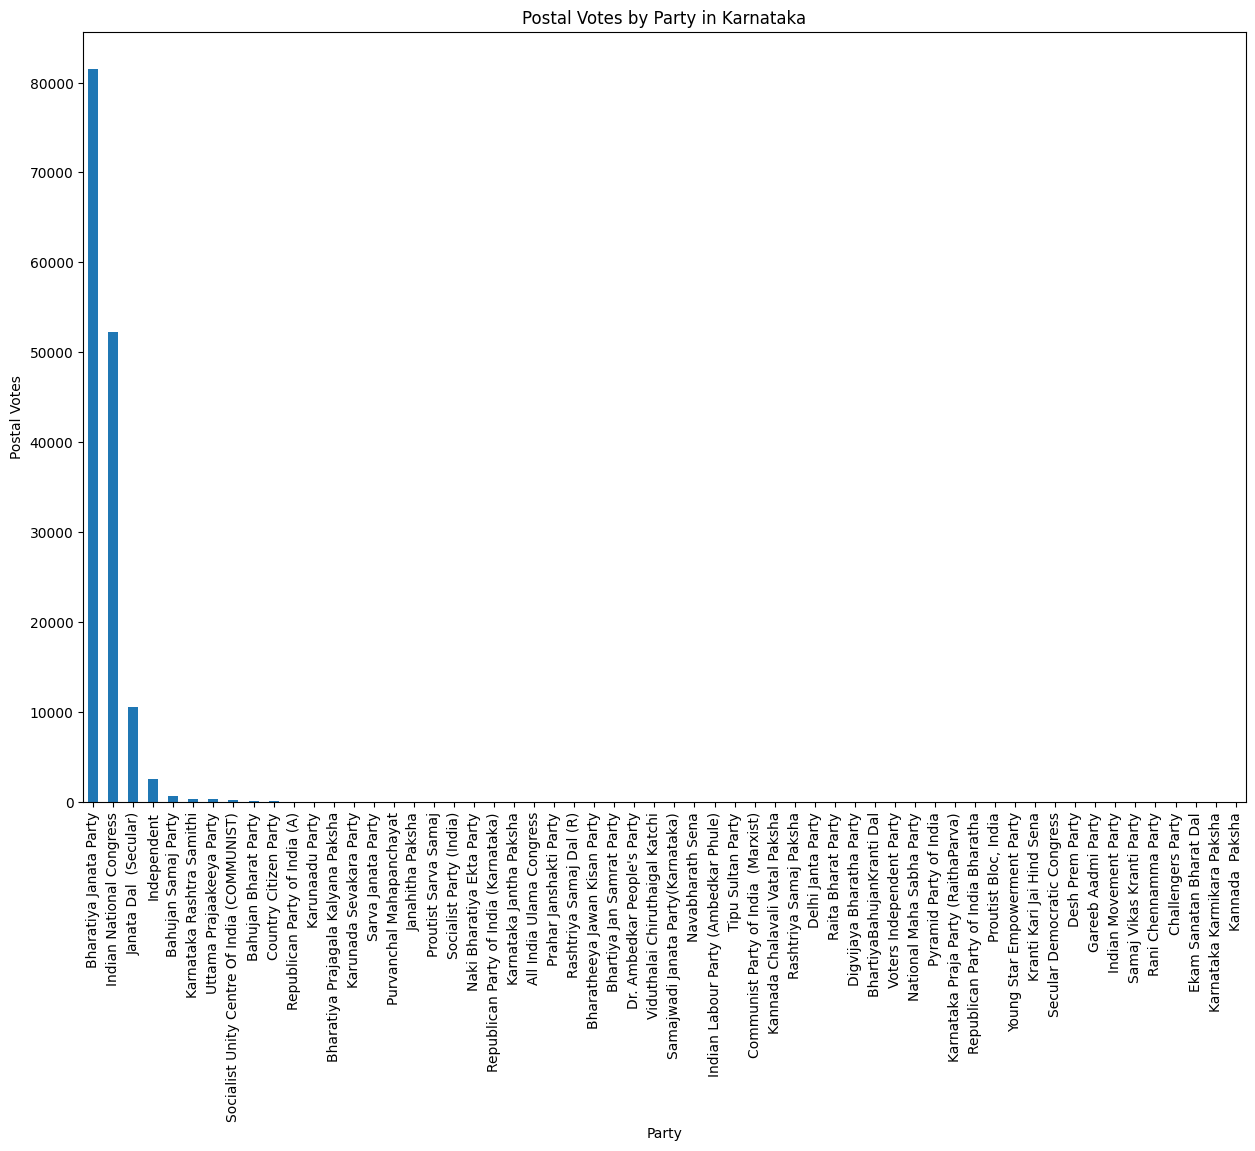

In [ ]:
#Without using matplotlib
#Replacing '-' with 0
df["Postal Votes"] = df["Postal Votes"].replace("-", '0')

#Converting object to numeric datatype
df["Postal Votes"] = pd.to_numeric(df["Postal Votes"])

#ENTIRE GRAPH
df.loc[(df["State"] == "Karnataka") & (df["Party"] != "None of the Above")].groupby("Party")["Postal Votes"].sum().sort_values(ascending=False).plot(kind='bar', title='Postal Votes by Party in Karnataka', figsize=(15, 10), xlabel="Party", ylabel="Postal Votes")

<Axes: title={'center': 'Postal Votes by Party in Karnataka'}, xlabel='Party', ylabel='Postal Votes'>

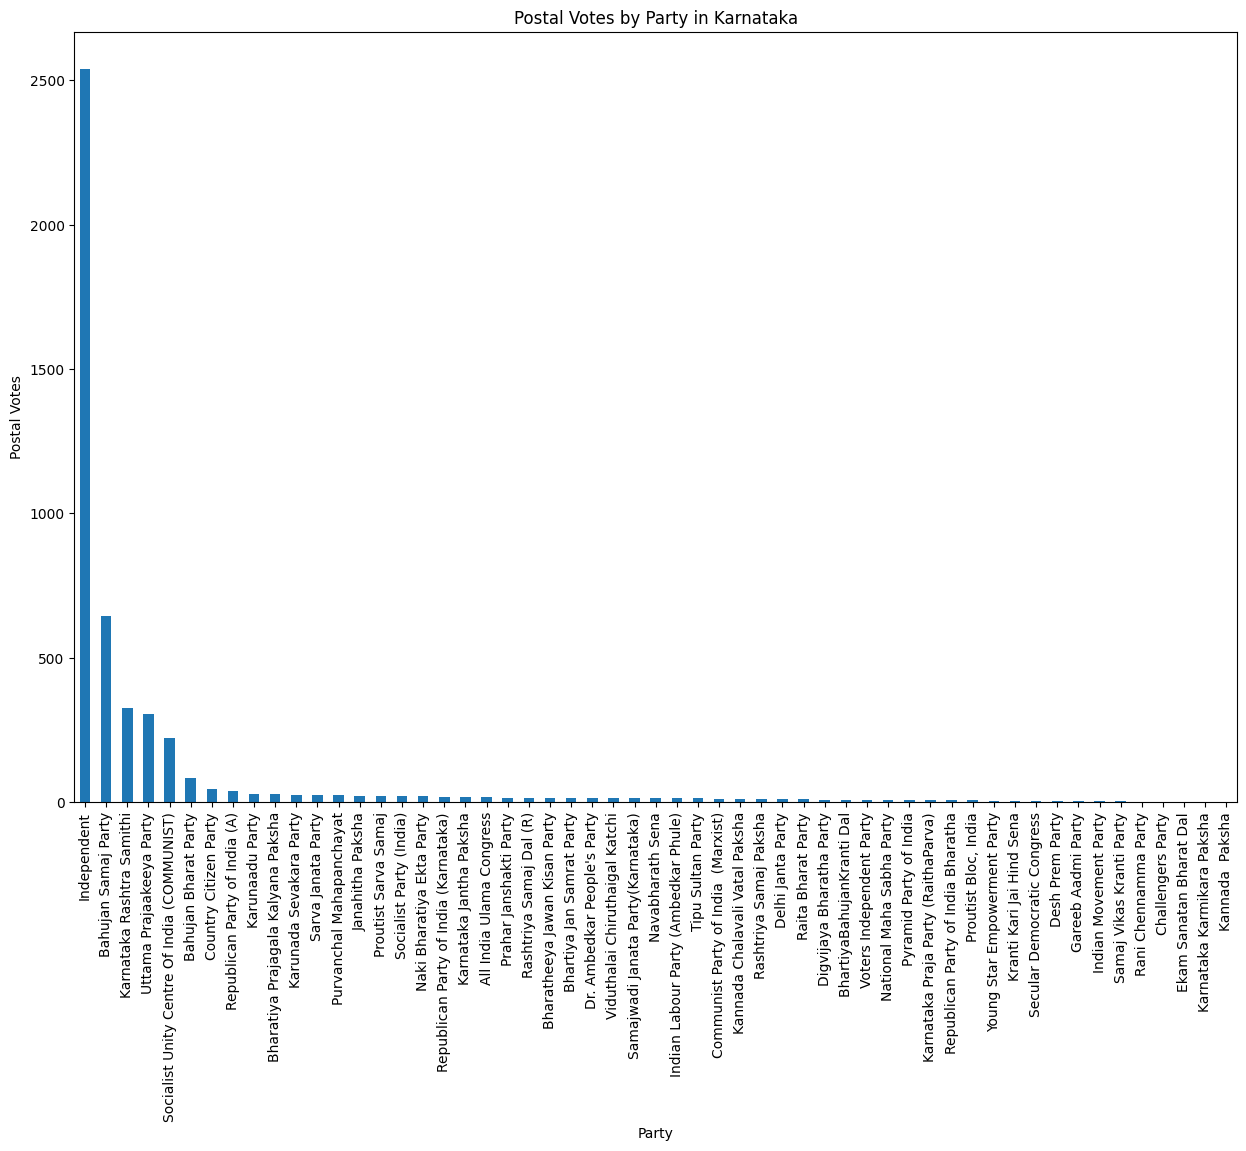

In [ ]:
#GRAPH FROM 4th PARTY ONWARDS (FOR A BETTER GRAPH)
df.loc[(df["State"] == "Karnataka") & (df["Party"] != "None of the Above")].groupby("Party")["Postal Votes"].sum().sort_values(ascending=False)[3:].plot(kind='bar', title='Postal Votes by Party in Karnataka', figsize=(15, 10), xlabel="Party", ylabel="Postal Votes")

<Axes: title={'center': 'Postal Votes by Party in Karnataka'}, xlabel='Party', ylabel='Postal Votes'>

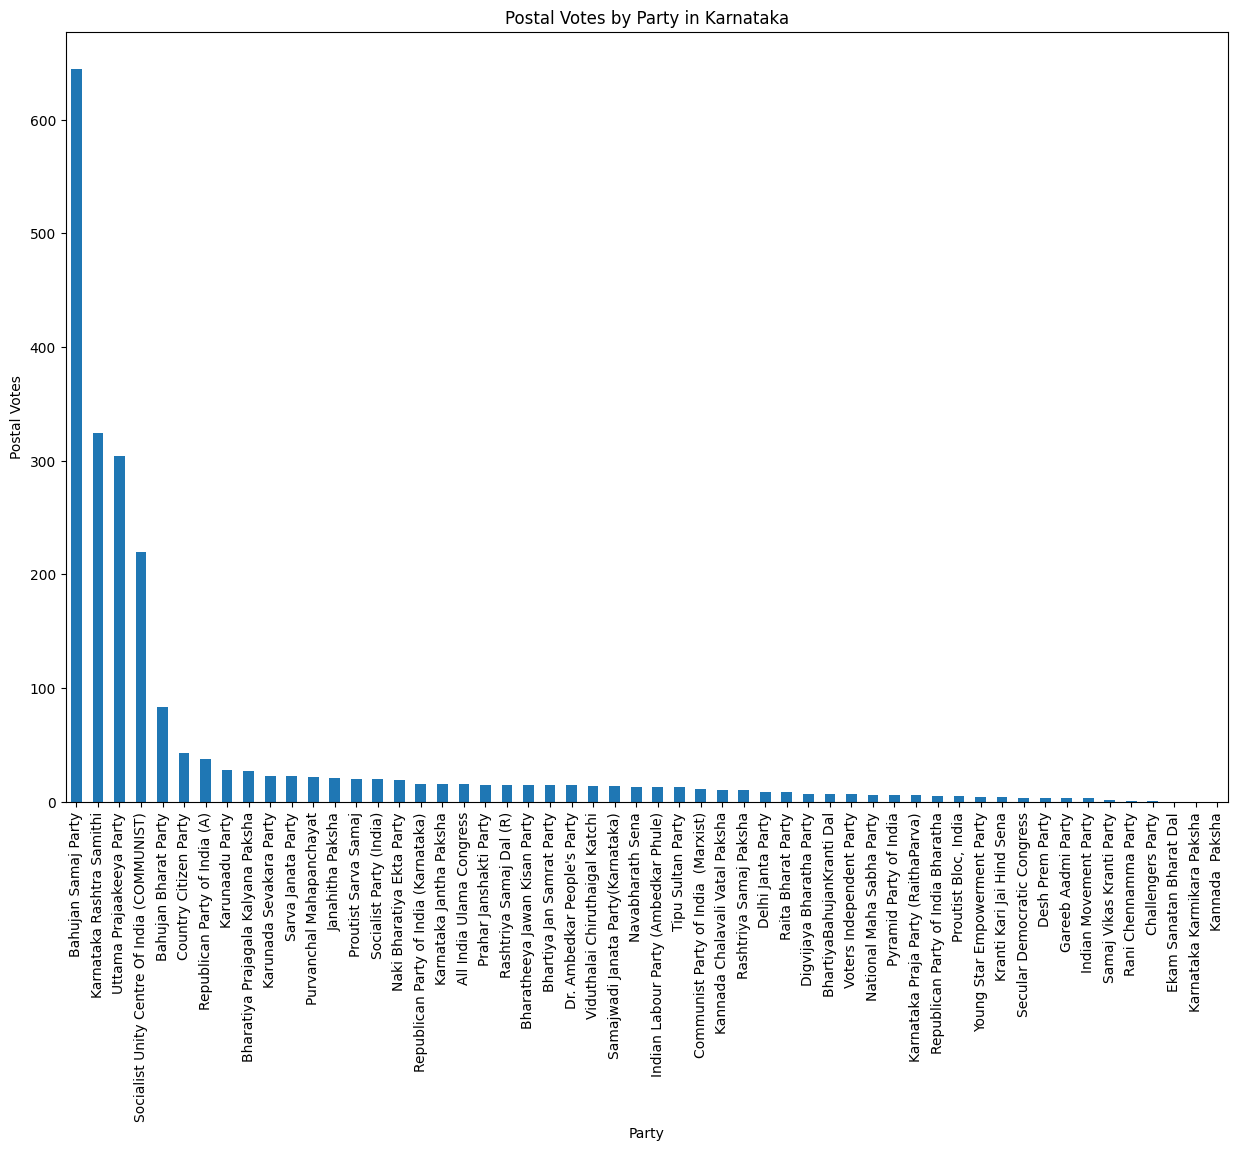

In [ ]:
#GRAPH FROM 5th PARTY ONWARDS (FOR A BETTER GRAPH)
df.loc[(df["State"] == "Karnataka") & (df["Party"] != "None of the Above")].groupby("Party")["Postal Votes"].sum().sort_values(ascending=False)[4:].plot(kind='bar', title='Postal Votes by Party in Karnataka', figsize=(15, 10), xlabel="Party", ylabel="Postal Votes")

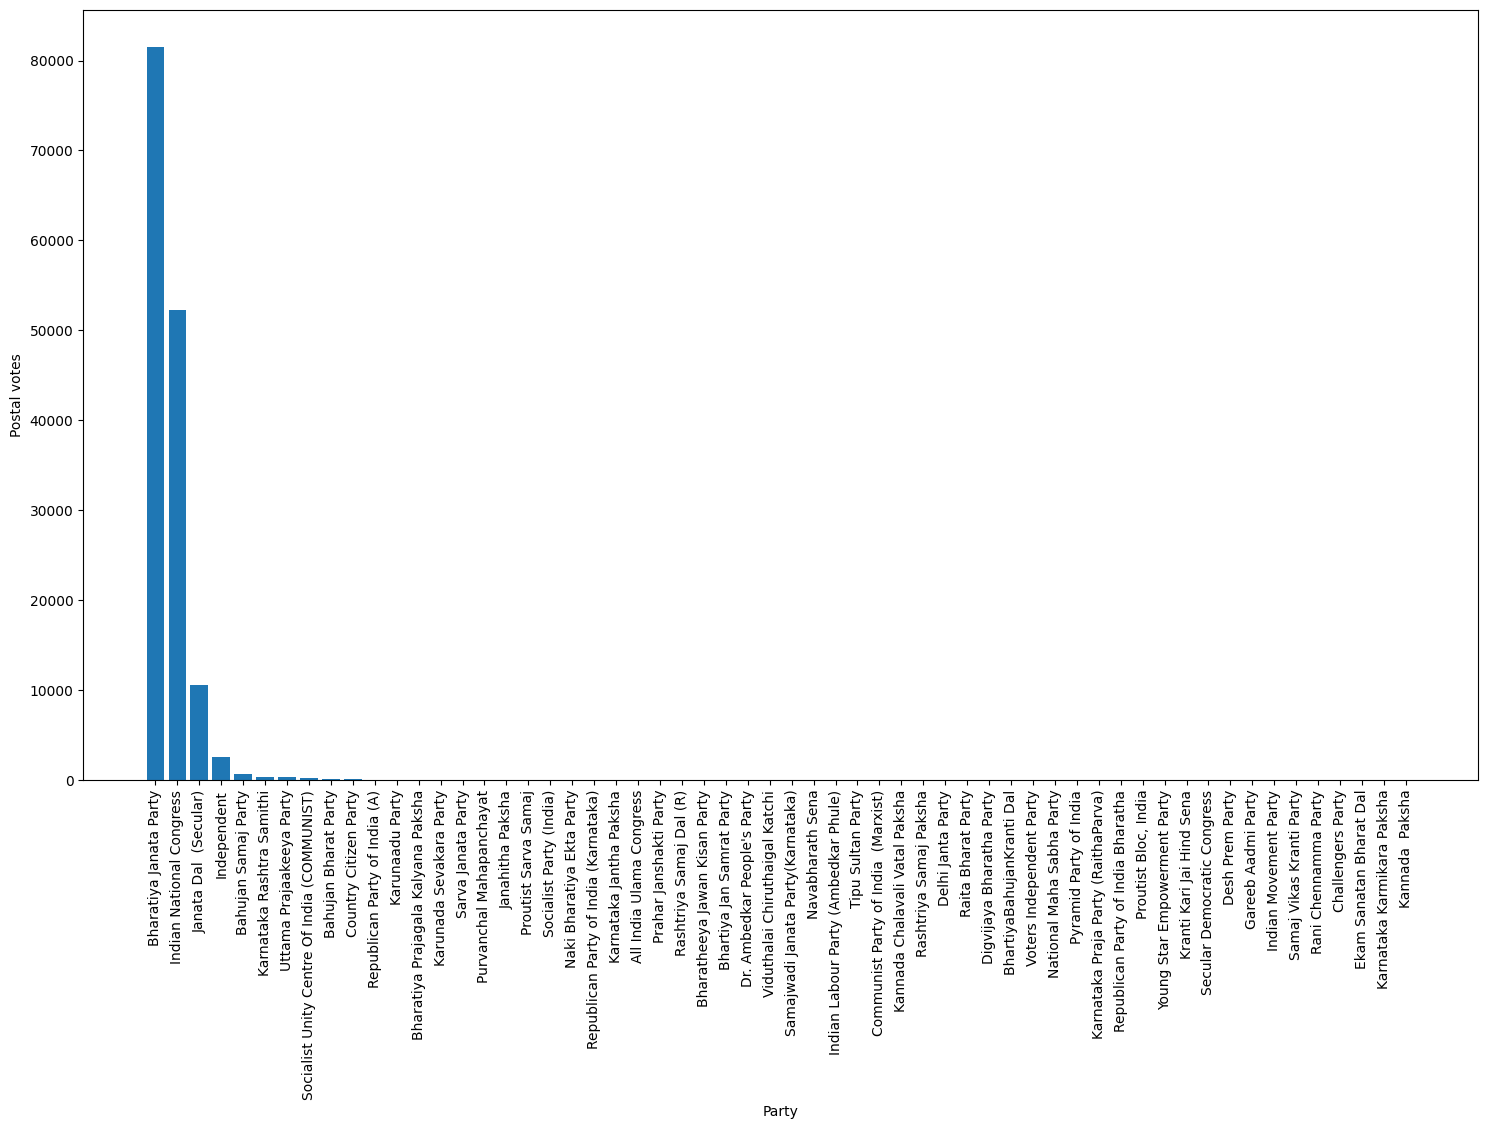

In [ ]:
#With using matplotlib

plt.figure(figsize = (18,10))

xAxis = df.loc[(df["State"] == "Karnataka") & (df["Party"] != "None of the Above")].groupby("Party")["Postal Votes"].sum().sort_values(ascending=False)

#ENTIRE GRAPH
plt.bar(xAxis.index, xAxis)
plt.xticks(rotation=90)
#xticks() is being used to rotate text by 90deg to prevent horizontal text clutter on x-axis
plt.xlabel("Party")
plt.ylabel("Postal votes")
plt.show()

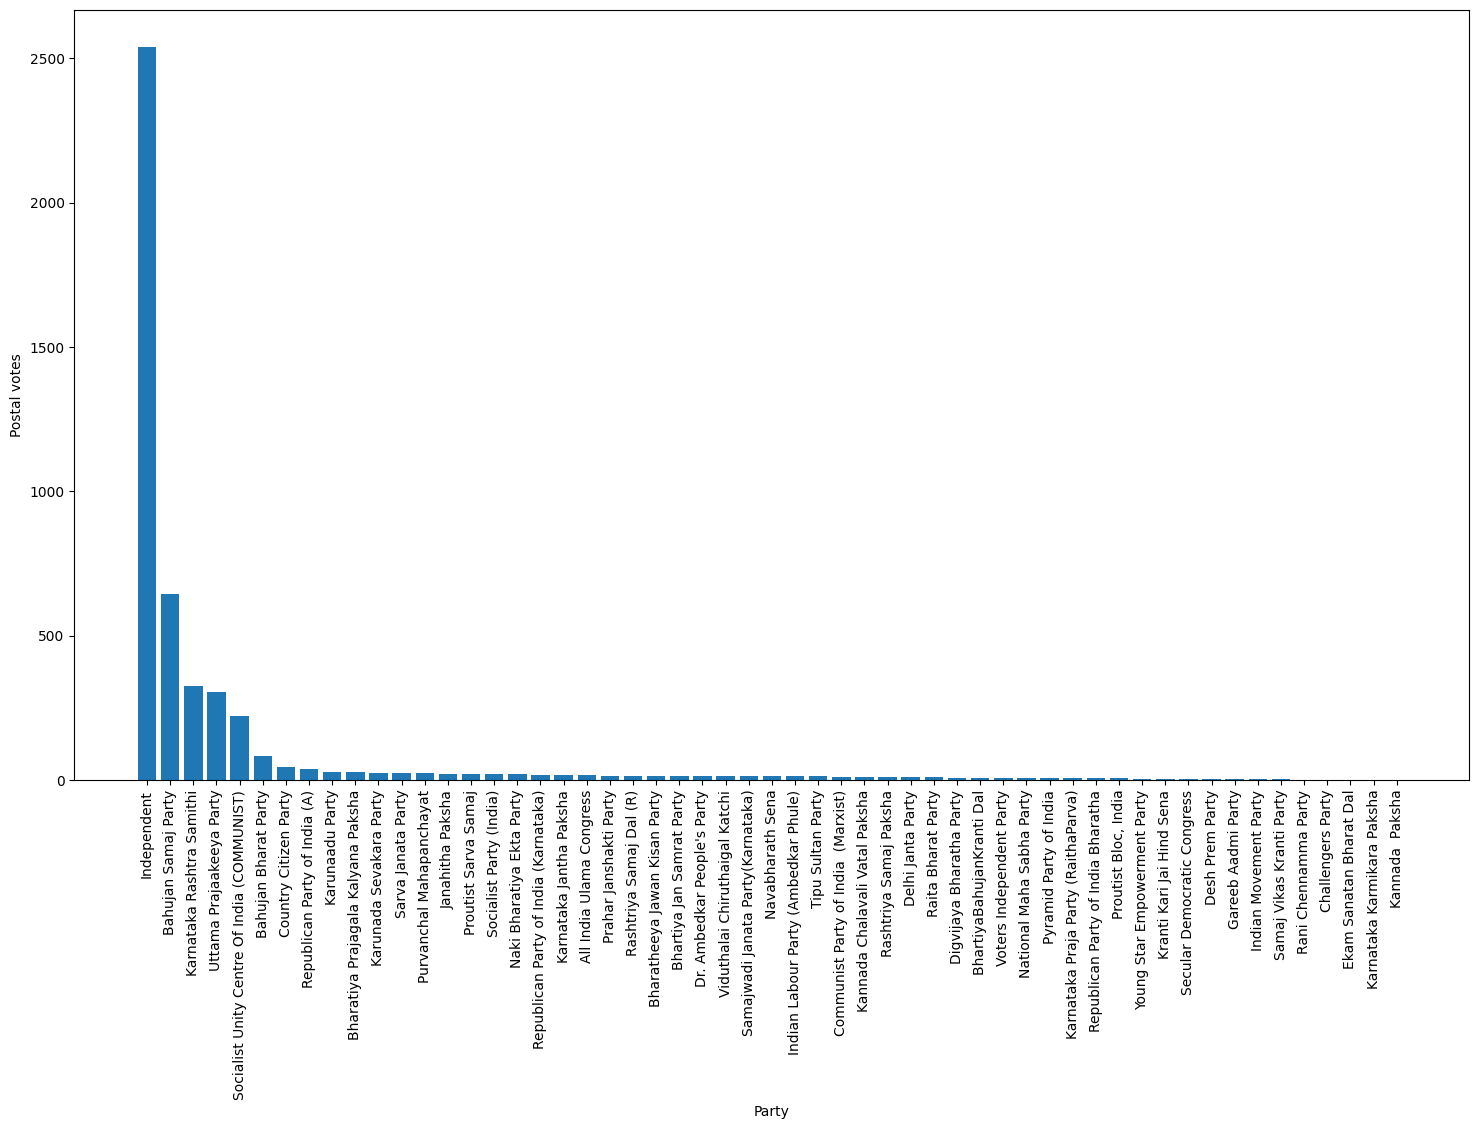

In [ ]:
#GRAPH FROM 4th PARTY ONWARDS (FOR A BETTER GRAPH)
plt.figure(figsize = (18,10))
plt.bar(xAxis[3:].index, xAxis[3:])
plt.xlabel("Party")
plt.ylabel("Postal votes")
plt.xticks(rotation=90)
plt.show()

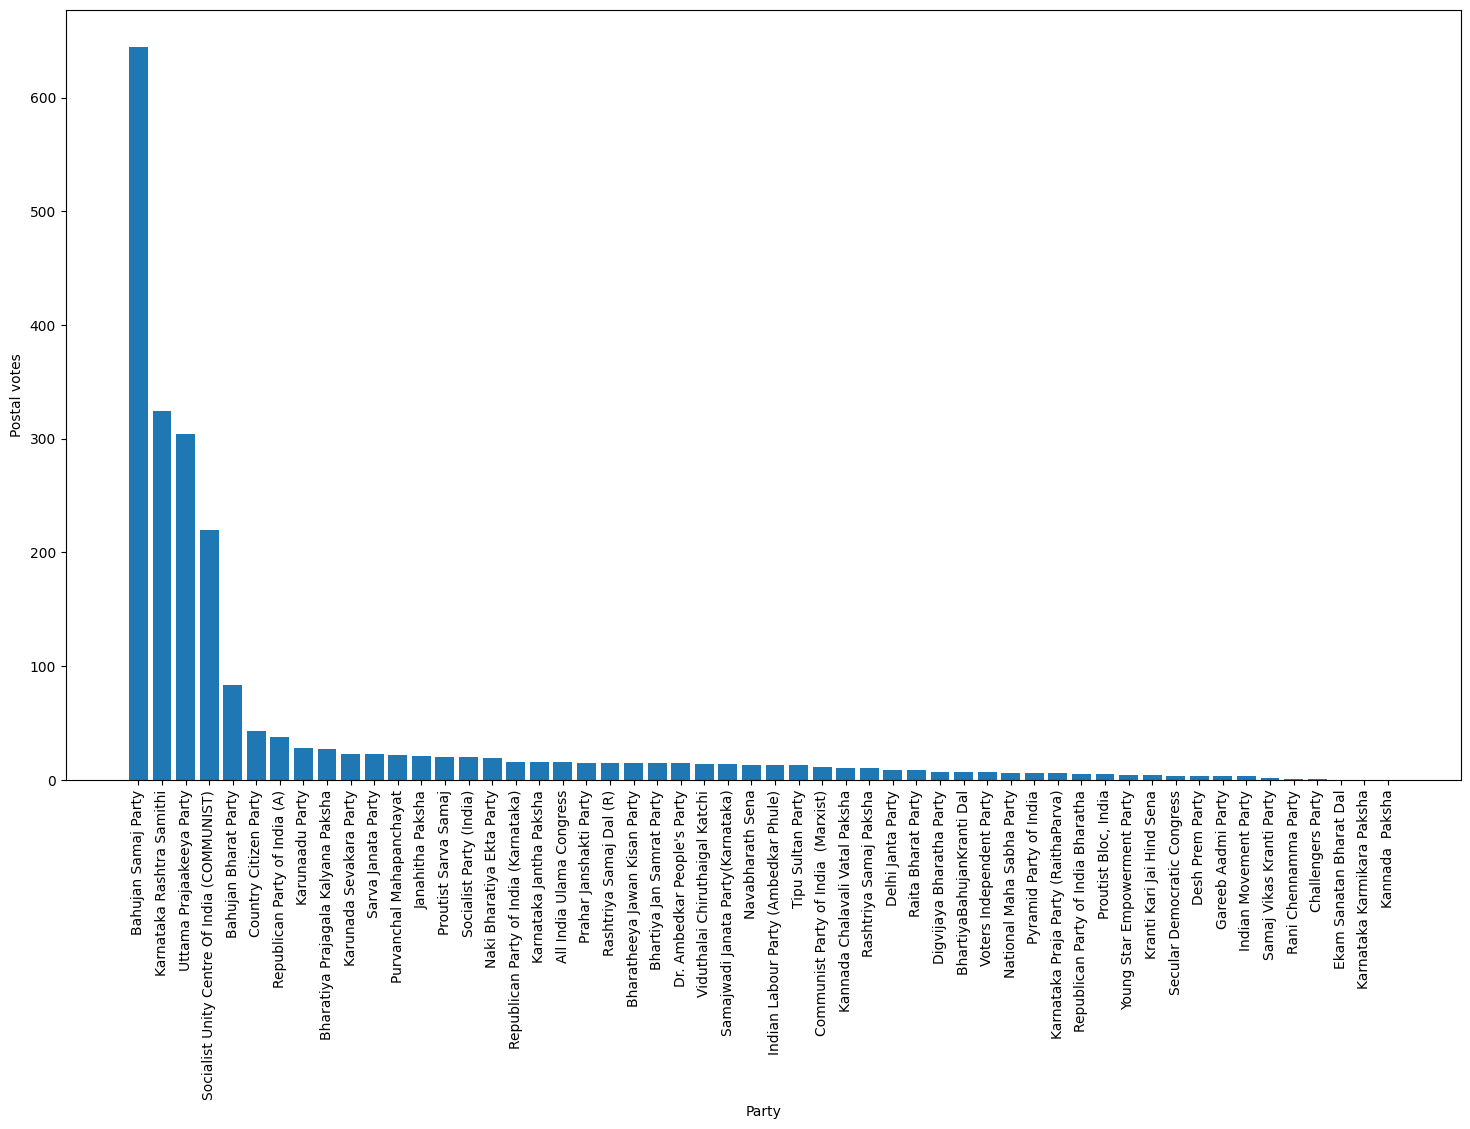

In [ ]:
#GRAPH FROM 5th PARTY ONWARDS (FOR A BETTER GRAPH)
plt.figure(figsize = (18,10))
plt.bar(xAxis[4:].index, xAxis[4:])
plt.xlabel("Party")
plt.ylabel("Postal votes")
plt.xticks(rotation=90)
plt.show()